In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv("01-Petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
#PERFORMING EDA

In [4]:
df.shape

(48, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


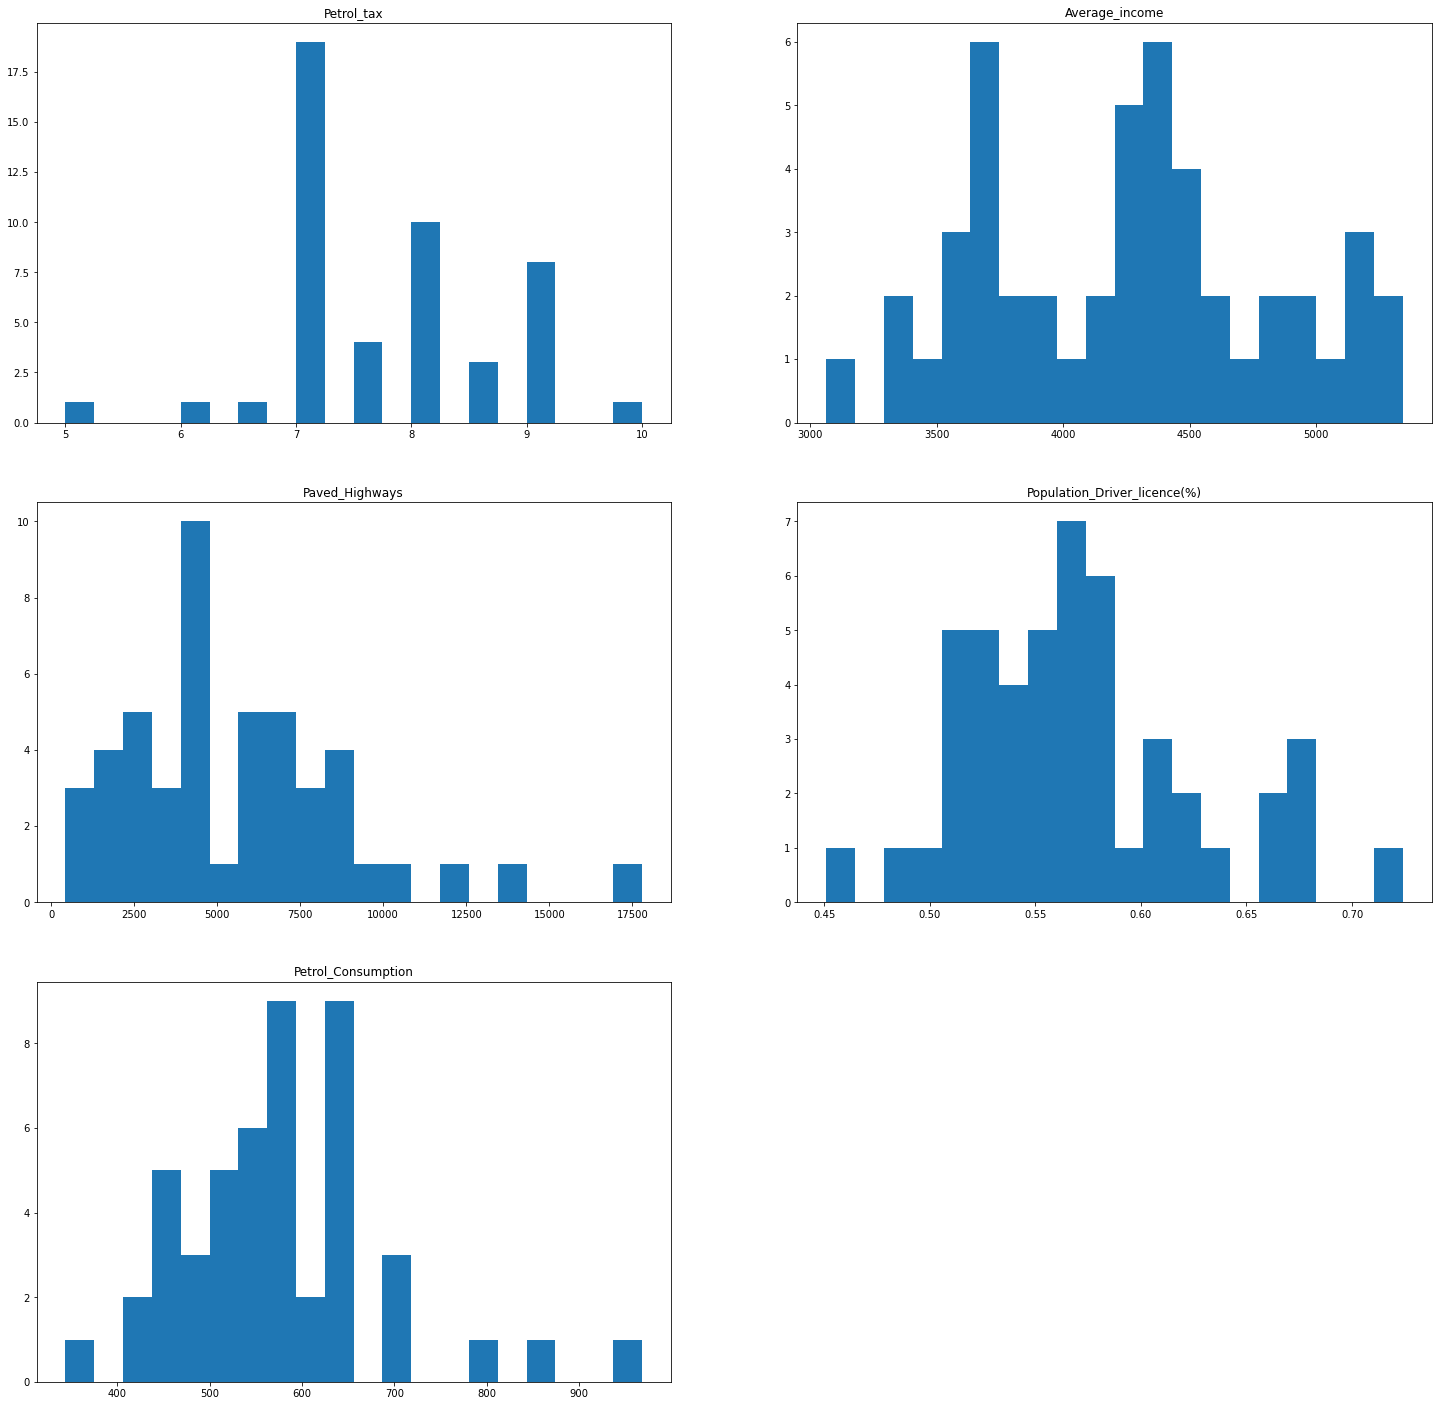

In [7]:
plt.figure(figsize = (25,25))
count=1
for col in df:
    plt.subplot(3,2,count)
    plt.hist(df[col],bins=20) 
    plt.title(col)
    count+=1
       
plt.show()

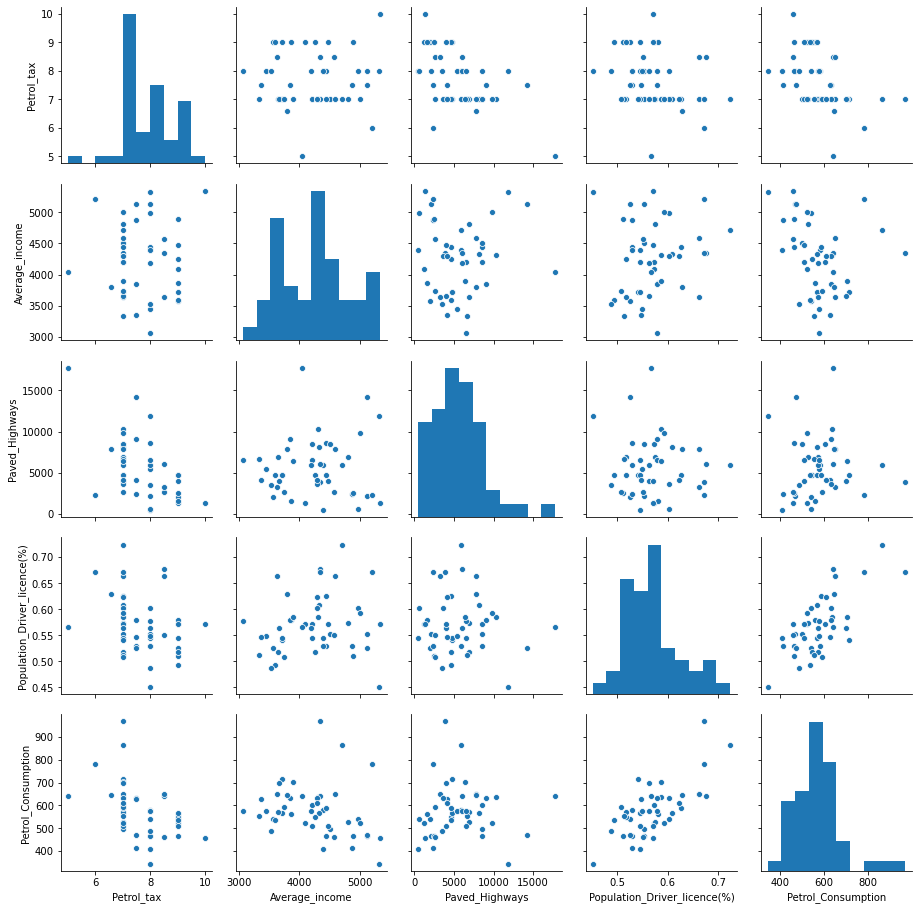

In [8]:
sns.pairplot(df)

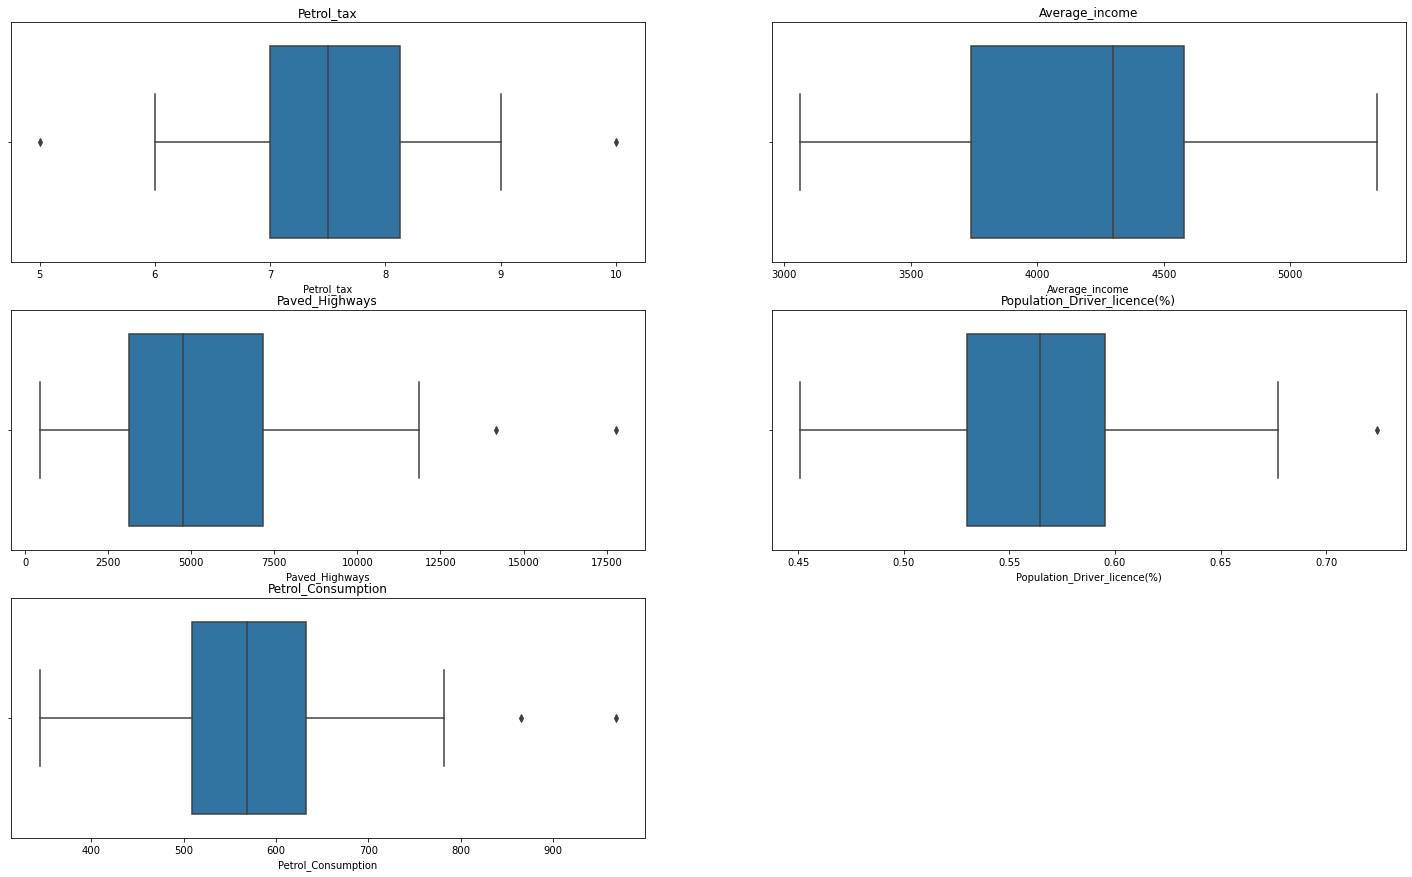

In [9]:
plt.figure(figsize = (25,15))
count=1
for col in df:
    plt.subplot(3,2,count)
    sns.boxplot(df[col]) 
    plt.title(col)
    count+=1
       
plt.show()

In [10]:
#Checking for outliers
for col in df:
    Q1 =  df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print (col, "--> " , df[(df[col] < Q1-1.5*IQR ) | (df[col] > Q3+1.5*IQR)][col])

Petrol_tax -->  5     10.0
36     5.0
Name: Petrol_tax, dtype: float64
Average_income -->  Series([], Name: Average_income, dtype: int64)
Paved_Highways -->  11    14186
36    17782
Name: Paved_Highways, dtype: int64
Population_Driver_licence(%) -->  18    0.724
Name: Population_Driver_licence(%), dtype: float64
Petrol_Consumption -->  18    865
39    968
Name: Petrol_Consumption, dtype: int64


In [11]:
df.drop([39,], inplace = True)
df.drop([36,], inplace = True)
df.drop([18,], inplace = True)
df.drop([11,], inplace = True)
df.drop([5,], inplace = True)

In [12]:
df.shape

(43, 5)

In [13]:
#Checking the correlation
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
Average_income,-0.109537,1.000000,0.051169,0.150689,-0.347326
Paved_Highways,-0.390602,0.051169,1.000000,-0.016193,0.034309
Population_Driver_licence(%),-0.314702,0.150689,-0.016193,1.000000,0.611788
Petrol_Consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [14]:
corr_ser = df.corr().iloc[-1,:].sort_values(ascending = False)
corr_ser

Petrol_Consumption              1.000000
Population_Driver_licence(%)    0.611788
Paved_Highways                  0.034309
Average_income                 -0.347326
Petrol_tax                     -0.446116
Name: Petrol_Consumption, dtype: float64

In [15]:
df.drop("Paved_Highways",axis=1, inplace = True)

In [16]:
#Dividing the training data into X and Y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
X.shape

(43, 3)

In [18]:
y.shape

(43,)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
#Splitting the data into Train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [21]:
# #Building Model
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([616.55549808, 628.08989336, 587.88509407, 524.01533577,
       557.7232418 , 556.08270456, 604.57196546, 573.37618837,
       620.17941256])

In [25]:
# #Checking the score and accuracy 
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,y_pred)

0.51697045414828